## Import Libraries

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Salary_Data.csv') # To read the dataset

In [4]:
df.head() # To check first 5 rows

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [6]:
df.tail() # To check last 5 rows

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [8]:
df.info() # To check the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
YearsExperience    30 non-null float64
Salary             30 non-null float64
dtypes: float64(2)
memory usage: 560.0 bytes


In [10]:
df.shape # To check the shape of the dataframe

(30, 2)

In [70]:
df['YearsExperience'].isnull().count() # To check for null values

30

In [71]:
df['Salary'].isnull().count() # To check for null values

30

In [72]:
df.describe() # To check some statistics like mean,std,Q1,Q2

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


## Data Visualization

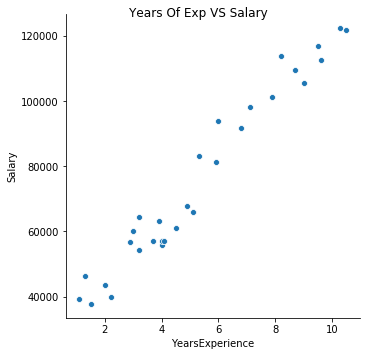

In [73]:
sns.pairplot(df,x_vars='YearsExperience',y_vars='Salary',height=5) # To visualize the relationship between the data
plt.suptitle("Years Of Exp VS Salary")
plt.show()

In [74]:
correlation_table=df.corr() # To check the correlation between the data

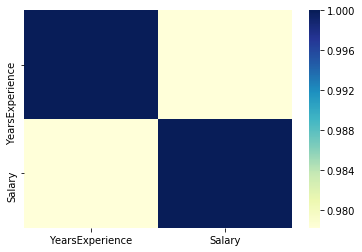

In [75]:
sns.heatmap(correlation_table,cmap='YlGnBu') # By seeing the dark blue colors we can say both salary and years of exp are highly corelated with each other
plt.show()

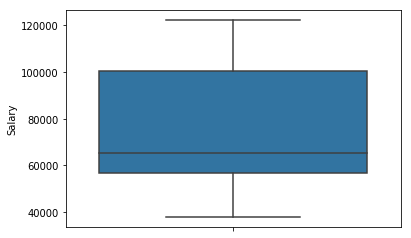

In [76]:
sns.boxplot(y=df.Salary) # By Seeing this box plot we can say there is no outliers in Salary column
plt.show()

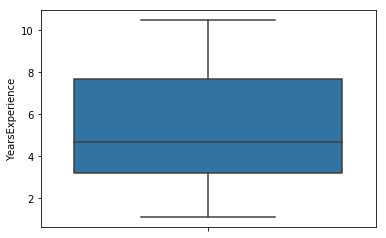

In [77]:
sns.boxplot(y=df.YearsExperience) # By Seeing this box plot we can say there is no outliers in Years Of Exp column
plt.show()

## Preparing Features and Responses

In [88]:
x = df[['YearsExperience']]
x.head()

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [89]:
y=df['Salary']
y.head()

0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: Salary, dtype: float64

In [90]:
from sklearn.cross_validation import train_test_split # Spiltting data into train and test

In [91]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=100)

In [92]:
print(type(x_train))
print(type(x_test))
print(type(y_train))
print(type(y_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [96]:
from sklearn.linear_model import LinearRegression # Performing Linear Regression

In [97]:
lr = LinearRegression()

In [98]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [100]:
print(lr.coef_)              #Finding coefficients and intercept
print(lr.intercept_)

[9731.20383825]
25202.887786154883


In [102]:
y_pred = lr.predict(x_test) # Predicting the values w.r.t test data set i.e x_test

In [108]:
type(y_pred)
y_pred.shape

(9,)

## Plotting the observations

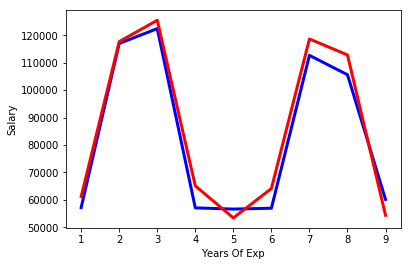

In [120]:
#Actual vs Predicted

c= [i for i in range(1,10,1)]
plt.plot(c,y_test,color='blue',Linewidth=3.0)
plt.plot(c,y_pred,color='red',Linewidth=3.0)
plt.xlabel('Years Of Exp')
plt.ylabel('Salary')
plt.show()

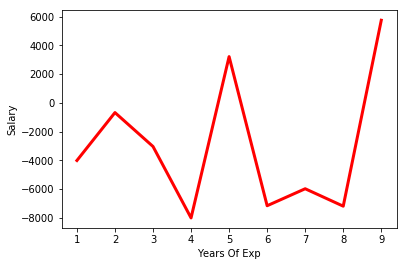

In [122]:
#Error Terms

c= [i for i in range(1,10,1)]
plt.plot(c,y_test-y_pred,color='red',Linewidth=3.0)
plt.xlabel('Years Of Exp')
plt.ylabel('Salary')
plt.show()

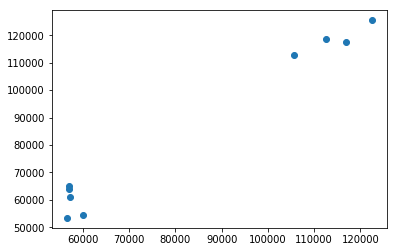

In [143]:
plt.scatter(y_test,y_pred)

In [123]:
#Calculating MSE and R square values
from sklearn.metrics import mean_squared_error,r2_score

In [124]:
mse = mean_squared_error(y_test,y_pred)

In [125]:
r_square = r2_score(y_test,y_pred)

In [127]:
print(mse)
print(r_square) #here r_square value is 96.27% means its a very good model

30310299.043402452
0.9627668685473267


In [129]:
# Finding P values and R square values from summary
import statsmodels.api as sm

In [133]:
lr1=sm.OLS(x_train,y_train).fit()

In [135]:
lr1.summary() # By seeing the summary table we can say that R-Squared values is 97% and P value is 0.00 which is less than 0.05 hence its a good model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        YearsExperience   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     685.3
Date:                Mon, 17 Dec 2018   Prob (F-statistic):           6.00e-17
Time:                        23:46:30   Log-Likelihood:                -28.381
No. Observations:                  21   AIC:                             58.76
Df Residuals:                      20   BIC:                             59.81
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Salary      7.064e-05    2.7e-06     26.179      0.000     6.5e-05    7.63e-05
==============================================================================
Omnibus:                        0.304   Durbin-Watson:                   2.388
Prob(Omnibus):                  0.859   Jarque-Bera (JB):                0.087
Skew:                           0.145   Prob(JB):                        0.957
Kurtosis:                       2.878   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""